In [1]:
import requests
import numpy as np
import pandas as pd
from census import Census
import matplotlib.pyplot as plt
import json
from scipy.stats import linregress
import scipy.stats as stats

from api_keys import weather_api_key
from api_keys import geoapify_key

In [2]:
sub_med_inc = pd.read_csv("Sub_med_inc.csv")
sub_med_inc = pd.DataFrame(sub_med_inc)
sub_med_inc.head()

,Unnamed: 0,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 13
0,ABBOTSFORD,714000,792500,862500,925000,1187500,1280000,1192500,1050000,1200000,1365000,1341500,1409000.0,NaN
1,ABERFELDIE,852500,947500,1045000,1207500,1300000,1471000,1498500,1390000,1520000,1858000,1860000,NaN,NaN
2,AINTREE,-,-,-,600000,600000,571000,557500,575000,630000,719000,760000,710000.0,NaN
3,AIREYS INLET,634000,664000,625500,680000,715000,737500,869000,985000,1132500,1775000,1725000,1570000.0,NaN
4,AIRPORT WEST,495000,532000,575000,635000,742000,845000,845000,795000,812500,965000,926500,795000.0,NaN


In [3]:
sub_med_inc.dtypes

Unnamed: 0      object
2012            object
2013            object
2014            object
2015            object
2016            object
2017            object
2018            object
2019            object
2020             int64
2021             int64
2022            object
2023           float64
Unnamed: 13    float64
dtype: object

In [4]:
columns_to_convert = ["2012","2013","2014","2015","2016","2017","2018","2019","2020","2021","2022","2023"]
for col in columns_to_convert:
    sub_med_inc[col] = pd.to_numeric(sub_med_inc[col], errors='coerce').astype(float)

sub_med_inc.dtypes

Unnamed: 0      object
2012           float64
2013           float64
2014           float64
2015           float64
2016           float64
2017           float64
2018           float64
2019           float64
2020           float64
2021           float64
2022           float64
2023           float64
Unnamed: 13    float64
dtype: object

In [5]:
sub_med_inc = sub_med_inc.rename(columns={"Unnamed: 0":"Suburb"
                                        })
sub_med_inc.head()

,Suburb,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 13
0,ABBOTSFORD,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1050000.0,1200000.0,1365000.0,1341500.0,1409000.0,NaN
1,ABERFELDIE,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1471000.0,1498500.0,1390000.0,1520000.0,1858000.0,1860000.0,NaN,NaN
2,AINTREE,NaN,NaN,NaN,600000.0,600000.0,571000.0,557500.0,575000.0,630000.0,719000.0,760000.0,710000.0,NaN
3,AIREYS INLET,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1132500.0,1775000.0,1725000.0,1570000.0,NaN
4,AIRPORT WEST,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,845000.0,795000.0,812500.0,965000.0,926500.0,795000.0,NaN


In [6]:
del sub_med_inc["Unnamed: 13"]
sub_med_inc

,Suburb,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ABBOTSFORD,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1050000.0,1200000.0,1365000.0,1341500.0,1409000.0
1,ABERFELDIE,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1471000.0,1498500.0,1390000.0,1520000.0,1858000.0,1860000.0,NaN
2,AINTREE,NaN,NaN,NaN,600000.0,600000.0,571000.0,557500.0,575000.0,630000.0,719000.0,760000.0,710000.0
3,AIREYS INLET,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1132500.0,1775000.0,1725000.0,1570000.0
4,AIRPORT WEST,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,845000.0,795000.0,812500.0,965000.0,926500.0,795000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,YARRAM,215000.0,190000.0,202500.0,245000.0,230000.0,225000.0,218000.0,240000.0,260000.0,360000.0,462500.0,387500.0
822,YARRAVILLE,613000.0,696000.0,710000.0,810000.0,900500.0,1000000.0,1045000.0,971000.0,1033000.0,1195000.0,1205000.0,1070000.0
823,YARRAWONGA,300000.0,302500.0,297000.0,300500.0,320000.0,324500.0,345000.0,375000.0,456500.0,565000.0,665000.0,591000.0
824,YEA,255000.0,260000.0,255000.0,260000.0,305000.0,385000.0,390000.0,435500.0,422500.0,570000.0,617500.0,420000.0


In [7]:
sub_data = pd.DataFrame(sub_med_inc["Suburb"])
sub_data.set_index('Suburb', inplace=True)
sub_data["Lat"] = ""
sub_data["Lon"] = ""
sub_data["Temp"] = ""
sub_data.head()

,Lat,Lon,Temp
Suburb,,,
ABBOTSFORD,,,
ABERFELDIE,,,
AINTREE,,,
AIREYS INLET,,,
AIRPORT WEST,,,


In [8]:
# Set the API base URL
url = "https://api.geoapify.com/v1/geocode/search?text="

# Loop through all the cities in our list to fetch weather data
for suburb in sub_data.index:

    # Create endpoint URL with each city
    
    suburb_formatted = suburb + ", Victoria, Australia"
    
    suburb_url = f"{url}{suburb_formatted}&format=json&apiKey={geoapify_key}"
    
    print(suburb_url)
    
        # Run an API request for each of the cities
    try:
        print(f"{suburb} found and processing")
        
        # Parse the JSON and retrieve data
        sub_loc = requests.get(suburb_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        sub_lat = sub_loc["results"][0]["lat"]
        sub_lng = sub_loc["results"][0]["lon"]

        # Append the City information into city_data list
        sub_data.loc[suburb, "Lat"] = sub_lat
        sub_data.loc[suburb, "Lon"] = sub_lng
    
        print(f"{sub_lat}, {sub_lng}")
                                            

    # If an error is experienced, skip the city
    except:
            print("Suburb not found. Skipping...")
            pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

https://api.geoapify.com/v1/geocode/search?text=ABBOTSFORD, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
ABBOTSFORD found and processing
-37.8045508, 144.9988542
https://api.geoapify.com/v1/geocode/search?text=ABERFELDIE, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
ABERFELDIE found and processing
-37.7596196, 144.8974571
https://api.geoapify.com/v1/geocode/search?text=AINTREE, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
AINTREE found and processing
-37.7193933, 144.6694023
https://api.geoapify.com/v1/geocode/search?text=AIREYS INLET, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
AIREYS INLET found and processing
-38.4620894, 144.1067555
https://api.geoapify.com/v1/geocode/search?text=AIRPORT WEST, Victoria, Australia&format=json&apiKey=bc436cbe9c274d6f92db1acacb620a9c
AIRPORT WEST found and processing
-37.7222576, 144.8834942
https://api.geoapify.com/v1/geocode/search?text=ALBAN

In [9]:
sub_data.head()

,Lat,Lon,Temp
Suburb,,,
ABBOTSFORD,-37.804551,144.998854,
ABERFELDIE,-37.75962,144.897457,
AINTREE,-37.719393,144.669402,
AIREYS INLET,-38.462089,144.106755,
AIRPORT WEST,-37.722258,144.883494,


In [10]:
# Set the API base URL
temp_url = "http://api.openweathermap.org/data/2.5/weather?"

# Loop through all the cities in our list to fetch weather data
for index, row in sub_data.iterrows():
    
    lat = row["Lat"]
    lon = row["Lon"]

    # Create endpoint URL with each city     
    suburb_url = f"{temp_url}lat={lat}&lon={lon}&appid={weather_api_key}&units=metric"

        # Run an API request for each of the cities
    try:
        print(f"{index} found and processing")
        
        # Parse the JSON and retrieve data
        sub_weather = requests.get(suburb_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        max_temp = sub_weather["main"]["temp"]

        # Append the City information into city_data list
        
        sub_data.loc[index, "Temp"] = max_temp
        
        print(max_temp)
                                  
          

    # If an error is experienced, skip the city
    except:
            print("Suburb not found. Skipping...")
            pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

ABBOTSFORD found and processing
13.98
ABERFELDIE found and processing
13.99
AINTREE found and processing
13.2
AIREYS INLET found and processing
10.74
AIRPORT WEST found and processing
13.59
ALBANVALE found and processing
13.36
ALBERT PARK found and processing
13.92
ALBION found and processing
13.69
ALEXANDRA found and processing
13.19
ALFREDTON found and processing
12.47
ALLANSFORD found and processing
10.66
ALPHINGTON found and processing
13.89
ALTONA found and processing
13.86
ALTONA EAST found and processing
13.89
ALTONA MEADOWS found and processing
13.82
ALTONA NORTH found and processing
13.88
ANGLESEA found and processing
10.94
APOLLO BAY found and processing
9.75
ARARAT found and processing
11.26
ARDEER found and processing
13.69
ARMADALE found and processing
13.68
ARMSTRONG CREEK found and processing
12.13
ASCOT (GREATER BENDIGO) found and processing
12.71
ASCOT VALE found and processing
13.97
ASHBURTON found and processing
13.58
ASHWOOD found and processing
13.52
ASPENDALE foun

In [11]:
sub_data

,Lat,Lon,Temp
Suburb,,,
ABBOTSFORD,-37.804551,144.998854,13.98
ABERFELDIE,-37.75962,144.897457,13.99
AINTREE,-37.719393,144.669402,13.2
AIREYS INLET,-38.462089,144.106755,10.74
AIRPORT WEST,-37.722258,144.883494,13.59
...,...,...,...
YARRAM,-38.561672,146.675887,9.45
YARRAVILLE,-37.818005,144.881939,13.92
YARRAWONGA,-36.014169,146.006349,12.53


In [12]:
merged_df = pd.merge(sub_med_inc, sub_data, on='Suburb', how='inner')
merged_df = pd.DataFrame(merged_df)
merged_df 

,Suburb,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Lat,Lon,Temp
0,ABBOTSFORD,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1050000.0,1200000.0,1365000.0,1341500.0,1409000.0,-37.804551,144.998854,13.98
1,ABERFELDIE,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1471000.0,1498500.0,1390000.0,1520000.0,1858000.0,1860000.0,NaN,-37.75962,144.897457,13.99
2,AINTREE,NaN,NaN,NaN,600000.0,600000.0,571000.0,557500.0,575000.0,630000.0,719000.0,760000.0,710000.0,-37.719393,144.669402,13.2
3,AIREYS INLET,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1132500.0,1775000.0,1725000.0,1570000.0,-38.462089,144.106755,10.74
4,AIRPORT WEST,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,845000.0,795000.0,812500.0,965000.0,926500.0,795000.0,-37.722258,144.883494,13.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
821,YARRAM,215000.0,190000.0,202500.0,245000.0,230000.0,225000.0,218000.0,240000.0,260000.0,360000.0,462500.0,387500.0,-38.561672,146.675887,9.45
822,YARRAVILLE,613000.0,696000.0,710000.0,810000.0,900500.0,1000000.0,1045000.0,971000.0,1033000.0,1195000.0,1205000.0,1070000.0,-37.818005,144.881939,13.92
823,YARRAWONGA,300000.0,302500.0,297000.0,300500.0,320000.0,324500.0,345000.0,375000.0,456500.0,565000.0,665000.0,591000.0,-36.014169,146.006349,12.53
824,YEA,255000.0,260000.0,255000.0,260000.0,305000.0,385000.0,390000.0,435500.0,422500.0,570000.0,617500.0,420000.0,-37.213047,145.422469,13.56


In [19]:
temp_price_2023 = merged_df[["2023", "Temp"]]
temp_price_2023 = temp_price_2023.dropna(how="any")
temp_price_2023

,2023,Temp
0,1409000.0,13.98
2,710000.0,13.20
3,1570000.0,10.74
4,795000.0,13.59
5,610000.0,13.36
...,...,...
821,387500.0,9.45
822,1070000.0,13.92
823,591000.0,12.53
824,420000.0,13.56


In [20]:
columns_to_convert = ["Lat","Lon","Temp"]
for col in columns_to_convert:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce').astype(float)

merged_df.dtypes

Suburb     object
2012      float64
2013      float64
2014      float64
2015      float64
2016      float64
2017      float64
2018      float64
2019      float64
2020      float64
2021      float64
2022      float64
2023      float64
Lat       float64
Lon       float64
Temp      float64
dtype: object

The r-squared is: 0.02058032206868336


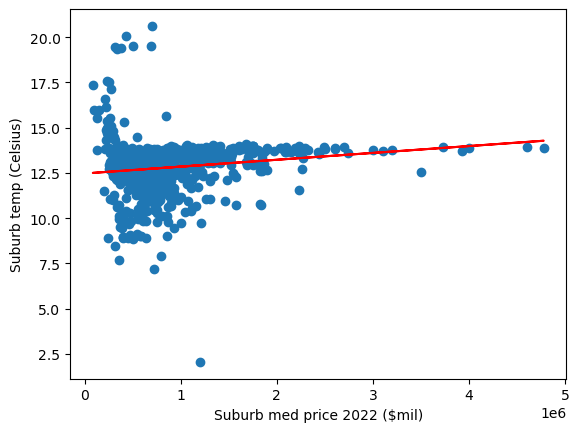

In [21]:
# Price vs Temp
x_values = temp_price_2023["2023"]
y_values = temp_price_2023["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Suburb med price 2022 ($mil)")
plt.ylabel("Suburb temp (Celsius)")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [25]:
# T-Test
stats.ttest_1samp(temp_price_2023["2023"], temp_price_2023["Temp"].mean())

TtestResult(statistic=44.82306238253905, pvalue=2.2464865158345402e-218, df=783)

In [26]:
#Finding Melbourne Lat, Lon
melb_formatted = "Melbourne, Victoria, Australia"
    
melb_url = f"{url}{melb_formatted}&format=json&apiKey={geoapify_key}"

melb_loc = requests.get(melb_url).json()

melb_lat = melb_loc["results"][0]["lat"]
melb_lng = melb_loc["results"][0]["lon"]
print(f"{melb_lat}, {melb_lng}")

-37.8142454, 144.9631732


In [27]:
# Finding Lat and Lon for Melbourne CBD
merged_df["Distance from CBD"] = ""
merged_df.set_index('Suburb', inplace=True)
merged_df

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Lat,Lon,Temp,Distance from CBD
Suburb,,,,,,,,,,,,,,,,
ABBOTSFORD,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1050000.0,1200000.0,1365000.0,1341500.0,1409000.0,-37.804551,144.998854,13.98,
ABERFELDIE,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1471000.0,1498500.0,1390000.0,1520000.0,1858000.0,1860000.0,NaN,-37.759620,144.897457,13.99,
AINTREE,NaN,NaN,NaN,600000.0,600000.0,571000.0,557500.0,575000.0,630000.0,719000.0,760000.0,710000.0,-37.719393,144.669402,13.20,
AIREYS INLET,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1132500.0,1775000.0,1725000.0,1570000.0,-38.462089,144.106755,10.74,
AIRPORT WEST,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,845000.0,795000.0,812500.0,965000.0,926500.0,795000.0,-37.722258,144.883494,13.59,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YARRAM,215000.0,190000.0,202500.0,245000.0,230000.0,225000.0,218000.0,240000.0,260000.0,360000.0,462500.0,387500.0,-38.561672,146.675887,9.45,
YARRAVILLE,613000.0,696000.0,710000.0,810000.0,900500.0,1000000.0,1045000.0,971000.0,1033000.0,1195000.0,1205000.0,1070000.0,-37.818005,144.881939,13.92,
YARRAWONGA,300000.0,302500.0,297000.0,300500.0,320000.0,324500.0,345000.0,375000.0,456500.0,565000.0,665000.0,591000.0,-36.014169,146.006349,12.53,


In [28]:
# Set the API base URL
cbd_dist_url = f"https://api.geoapify.com/v1/routing?waypoints={melb_lat},{melb_lng}|"

# Loop through all the cities in our list to fetch weather data
for index, row in sub_data.iterrows():
    
    lat = row["Lat"]
    lon = row["Lon"]

    # Create endpoint URL with each city     
    suburb_cbd_dist_url = f"{cbd_dist_url}{lat},{lon}&mode=drive&apiKey={geoapify_key}"

        # Run an API request for each of the cities
    try:
        print(f"Calculating {index} from CBD")
        
        # Parse the JSON and retrieve data
        suburb_cbd = requests.get(suburb_cbd_dist_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        suburb_cbd_dist = suburb_cbd['features'][0]['properties']['distance']

        # Append the City information into city_data list
        
        merged_df.loc[index, "Distance from CBD"] = suburb_cbd_dist
        
        print(suburb_cbd_dist)
                                  
          

    # If an error is experienced, skip the city
    except:
            print("Suburb not found. Skipping...")
            pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Calculating ABBOTSFORD from CBD
4619
Calculating ABERFELDIE from CBD
10337
Calculating AINTREE from CBD
39577
Calculating AIREYS INLET from CBD
124210
Calculating AIRPORT WEST from CBD
17919
Calculating ALBANVALE from CBD
29520
Calculating ALBERT PARK from CBD
4724
Calculating ALBION from CBD
14989
Calculating ALEXANDRA from CBD
132439
Calculating ALFREDTON from CBD
129734.00000000001
Calculating ALLANSFORD from CBD
248445
Calculating ALPHINGTON from CBD
10002
Calculating ALTONA from CBD
20470
Calculating ALTONA EAST from CBD
15077
Calculating ALTONA MEADOWS from CBD
24546
Calculating ALTONA NORTH from CBD
16728
Calculating ANGLESEA from CBD
113260
Calculating APOLLO BAY from CBD
187220
Calculating ARARAT from CBD
205903
Calculating ARDEER from CBD
24951
Calculating ARMADALE from CBD
9697
Calculating ARMSTRONG CREEK from CBD
85033
Calculating ASCOT (GREATER BENDIGO) from CBD
163777
Calculating ASCOT VALE from CBD
9625
Calculating ASHBURTON from CBD
15107
Calculating ASHWOOD from CBD
16

In [29]:
# Converting Distance into KM
merged_df["Distance from CBD (km)"] = merged_df["Distance from CBD"]/1000
merged_df

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Lat,Lon,Temp,Distance from CBD,Distance from CBD (km)
Suburb,,,,,,,,,,,,,,,,,
ABBOTSFORD,714000.0,792500.0,862500.0,925000.0,1187500.0,1280000.0,1192500.0,1050000.0,1200000.0,1365000.0,1341500.0,1409000.0,-37.804551,144.998854,13.98,4619,4.619
ABERFELDIE,852500.0,947500.0,1045000.0,1207500.0,1300000.0,1471000.0,1498500.0,1390000.0,1520000.0,1858000.0,1860000.0,NaN,-37.759620,144.897457,13.99,10337,10.337
AINTREE,NaN,NaN,NaN,600000.0,600000.0,571000.0,557500.0,575000.0,630000.0,719000.0,760000.0,710000.0,-37.719393,144.669402,13.20,39577,39.577
AIREYS INLET,634000.0,664000.0,625500.0,680000.0,715000.0,737500.0,869000.0,985000.0,1132500.0,1775000.0,1725000.0,1570000.0,-38.462089,144.106755,10.74,124210,124.21
AIRPORT WEST,495000.0,532000.0,575000.0,635000.0,742000.0,845000.0,845000.0,795000.0,812500.0,965000.0,926500.0,795000.0,-37.722258,144.883494,13.59,17919,17.919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YARRAM,215000.0,190000.0,202500.0,245000.0,230000.0,225000.0,218000.0,240000.0,260000.0,360000.0,462500.0,387500.0,-38.561672,146.675887,9.45,222795,222.795
YARRAVILLE,613000.0,696000.0,710000.0,810000.0,900500.0,1000000.0,1045000.0,971000.0,1033000.0,1195000.0,1205000.0,1070000.0,-37.818005,144.881939,13.92,11206,11.206
YARRAWONGA,300000.0,302500.0,297000.0,300500.0,320000.0,324500.0,345000.0,375000.0,456500.0,565000.0,665000.0,591000.0,-36.014169,146.006349,12.53,284064,284.064


In [30]:
# Converting Data types
columns_to_convert = ["Distance from CBD","Distance from CBD (km)"]
for col in columns_to_convert:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce').astype(float)

merged_df.dtypes


2012                      float64
2013                      float64
2014                      float64
2015                      float64
2016                      float64
2017                      float64
2018                      float64
2019                      float64
2020                      float64
2021                      float64
2022                      float64
2023                      float64
Lat                       float64
Lon                       float64
Temp                      float64
Distance from CBD         float64
Distance from CBD (km)    float64
dtype: object

In [31]:
# Dropping N/A values
temp_dist = merged_df[["Temp", "Distance from CBD (km)"]]
temp_dist = temp_dist.dropna(how="any")
temp_dist

,Temp,Distance from CBD (km)
Suburb,,
ABBOTSFORD,13.98,4.619
ABERFELDIE,13.99,10.337
AINTREE,13.20,39.577
AIREYS INLET,10.74,124.210
AIRPORT WEST,13.59,17.919
...,...,...
YARRAM,9.45,222.795
YARRAVILLE,13.92,11.206
YARRAWONGA,12.53,284.064


The r-squared is: 0.0071429767866583475


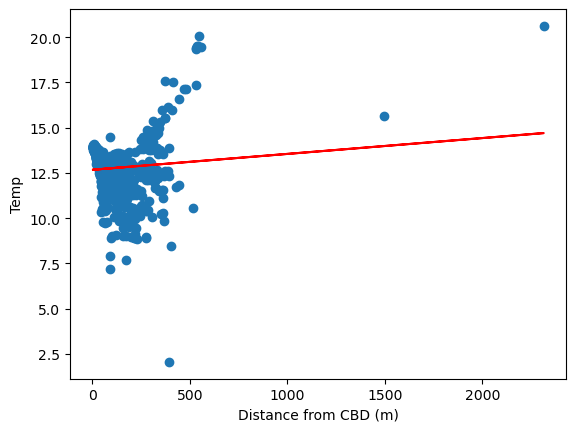

In [32]:
# Distance from CBD vs Temp
x_values = temp_dist["Distance from CBD (km)"]
y_values = temp_dist["Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Distance from CBD (m)")
plt.ylabel("Temp")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [33]:
stats.ttest_1samp(temp_dist["Distance from CBD (km)"], temp_dist["Temp"].mean())

TtestResult(statistic=20.438638826976668, pvalue=1.9274015992783215e-75, df=825)

In [34]:
# Droping N/A Values
dist_2023 = merged_df[["2023", "Distance from CBD (km)"]]
dist_2023 = dist_2023.dropna(how="any")
dist_2023

,2023,Distance from CBD (km)
Suburb,,
ABBOTSFORD,1409000.0,4.619
AINTREE,710000.0,39.577
AIREYS INLET,1570000.0,124.210
AIRPORT WEST,795000.0,17.919
ALBANVALE,610000.0,29.520
...,...,...
YARRAM,387500.0,222.795
YARRAVILLE,1070000.0,11.206
YARRAWONGA,591000.0,284.064


The r-squared is: 0.13249328360167065


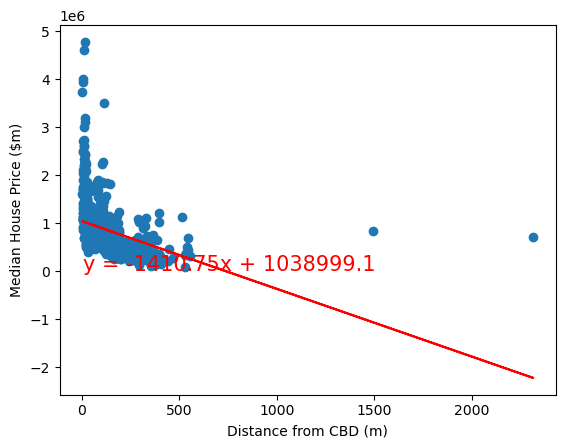

In [35]:
# Distance from CBD vs Median House price 
x_values = dist_2023["Distance from CBD (km)"]
y_values = dist_2023["2023"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Distance from CBD (m)")
plt.ylabel("Median House Price ($m)")
print(f"The r-squared is: {rvalue**2}")
plt.show()